In [1]:
import pandas as pd
df = pd.read_csv('../../../data/raw/aquifer/luco.csv')
print(df.shape)
df.head()

(7487, 22)


,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,5.50,0.80,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,6.20,3.25,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.25,0.95,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.00,4.20,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.90,6.55,NaN,NaN,NaN


In [2]:
df.columns.tolist()

['Date',
 'Rainfall_Simignano',
 'Rainfall_Siena_Poggio_al_Vento',
 'Rainfall_Mensano',
 'Rainfall_Montalcinello',
 'Rainfall_Monticiano_la_Pineta',
 'Rainfall_Sovicille',
 'Rainfall_Ponte_Orgia',
 'Rainfall_Scorgiano',
 'Rainfall_Pentolina',
 'Rainfall_Monteroni_Arbia_Biena',
 'Depth_to_Groundwater_Podere_Casetta',
 'Depth_to_Groundwater_Pozzo_1',
 'Depth_to_Groundwater_Pozzo_3',
 'Depth_to_Groundwater_Pozzo_4',
 'Temperature_Siena_Poggio_al_Vento',
 'Temperature_Mensano',
 'Temperature_Pentolina',
 'Temperature_Monteroni_Arbia_Biena',
 'Volume_Pozzo_1',
 'Volume_Pozzo_3',
 'Volume_Pozzo_4']

In [3]:
df.isnull().sum()

Date                                      0
Rainfall_Simignano                      665
Rainfall_Siena_Poggio_al_Vento         6536
Rainfall_Mensano                       5765
Rainfall_Montalcinello                  962
Rainfall_Monticiano_la_Pineta          5282
Rainfall_Sovicille                      830
Rainfall_Ponte_Orgia                   6227
Rainfall_Scorgiano                     4451
Rainfall_Pentolina                     5371
Rainfall_Monteroni_Arbia_Biena         4383
Depth_to_Groundwater_Podere_Casetta    4141
Depth_to_Groundwater_Pozzo_1           6475
Depth_to_Groundwater_Pozzo_3           6567
Depth_to_Groundwater_Pozzo_4           6518
Temperature_Siena_Poggio_al_Vento         0
Temperature_Mensano                       0
Temperature_Pentolina                     0
Temperature_Monteroni_Arbia_Biena         0
Volume_Pozzo_1                         5479
Volume_Pozzo_3                         5479
Volume_Pozzo_4                         5479
dtype: int64

In [4]:
100 * df.isnull().sum() / df.shape[0]

Date                                    0.000000
Rainfall_Simignano                      8.882062
Rainfall_Siena_Poggio_al_Vento         87.297983
Rainfall_Mensano                       77.000134
Rainfall_Montalcinello                 12.848938
Rainfall_Monticiano_la_Pineta          70.548952
Rainfall_Sovicille                     11.085882
Rainfall_Ponte_Orgia                   83.170829
Rainfall_Scorgiano                     59.449713
Rainfall_Pentolina                     71.737679
Rainfall_Monteroni_Arbia_Biena         58.541472
Depth_to_Groundwater_Podere_Casetta    55.309203
Depth_to_Groundwater_Pozzo_1           86.483238
Depth_to_Groundwater_Pozzo_3           87.712034
Depth_to_Groundwater_Pozzo_4           87.057566
Temperature_Siena_Poggio_al_Vento       0.000000
Temperature_Mensano                     0.000000
Temperature_Pentolina                   0.000000
Temperature_Monteroni_Arbia_Biena       0.000000
Volume_Pozzo_1                         73.180179
Volume_Pozzo_3      

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [6]:
for c in df.columns:
    errg = df[~df[c].isnull()]
    print(
        c,
        '...',
        pd.Timestamp(errg.iloc[0]['Date'].value).strftime('%D'),
        '--',
        pd.Timestamp(errg.iloc[-1]['Date'].value).strftime('%D')
    )

Date ... 01/01/00 -- 06/30/20
Rainfall_Simignano ... 02/24/00 -- 06/30/20
Rainfall_Siena_Poggio_al_Vento ... 11/23/17 -- 06/30/20
Rainfall_Mensano ... 10/14/15 -- 06/30/20
Rainfall_Montalcinello ... 04/04/02 -- 06/30/20
Rainfall_Monticiano_la_Pineta ... 06/18/14 -- 06/30/20
Rainfall_Sovicille ... 04/04/02 -- 06/30/20
Rainfall_Ponte_Orgia ... 01/18/17 -- 06/30/20
Rainfall_Scorgiano ... 01/01/12 -- 06/30/20
Rainfall_Pentolina ... 01/01/12 -- 06/30/20
Rainfall_Monteroni_Arbia_Biena ... 01/01/12 -- 06/30/20
Depth_to_Groundwater_Podere_Casetta ... 02/21/08 -- 01/12/19
Depth_to_Groundwater_Pozzo_1 ... 09/01/17 -- 06/30/20
Depth_to_Groundwater_Pozzo_3 ... 09/01/17 -- 06/30/20
Depth_to_Groundwater_Pozzo_4 ... 09/01/17 -- 06/30/20
Temperature_Siena_Poggio_al_Vento ... 01/01/00 -- 06/30/20
Temperature_Mensano ... 01/01/00 -- 06/30/20
Temperature_Pentolina ... 01/01/00 -- 06/30/20
Temperature_Monteroni_Arbia_Biena ... 01/01/00 -- 06/30/20
Volume_Pozzo_1 ... 01/01/15 -- 06/30/20
Volume_Pozzo_3 ...

In [7]:
# target doesn't start until 2/21/08, ends at 1/12/19

In [8]:
from datetime import datetime
df = df[df['Date'] > datetime(2008, 2, 20)]
df = df[df['Date'] < datetime(2019, 1, 13)]

In [9]:
df.isnull().sum()

Date                                      0
Rainfall_Simignano                      540
Rainfall_Siena_Poggio_al_Vento         3563
Rainfall_Mensano                       2792
Rainfall_Montalcinello                  137
Rainfall_Monticiano_la_Pineta          2309
Rainfall_Sovicille                        5
Rainfall_Ponte_Orgia                   3254
Rainfall_Scorgiano                     1478
Rainfall_Pentolina                     2398
Rainfall_Monteroni_Arbia_Biena         1410
Depth_to_Groundwater_Podere_Casetta     633
Depth_to_Groundwater_Pozzo_1           3499
Depth_to_Groundwater_Pozzo_3           3493
Depth_to_Groundwater_Pozzo_4           3493
Temperature_Siena_Poggio_al_Vento         0
Temperature_Mensano                       0
Temperature_Pentolina                     0
Temperature_Monteroni_Arbia_Biena         0
Volume_Pozzo_1                         2506
Volume_Pozzo_3                         2506
Volume_Pozzo_4                         2506
dtype: int64

In [10]:
100 * df.isnull().sum() / df.shape[0]

Date                                    0.000000
Rainfall_Simignano                     13.571249
Rainfall_Siena_Poggio_al_Vento         89.545112
Rainfall_Mensano                       70.168384
Rainfall_Montalcinello                  3.443076
Rainfall_Monticiano_la_Pineta          58.029656
Rainfall_Sovicille                      0.125660
Rainfall_Ponte_Orgia                   81.779342
Rainfall_Scorgiano                     37.145011
Rainfall_Pentolina                     60.266399
Rainfall_Monteroni_Arbia_Biena         35.436039
Depth_to_Groundwater_Podere_Casetta    15.908520
Depth_to_Groundwater_Pozzo_1           87.936668
Depth_to_Groundwater_Pozzo_3           87.785876
Depth_to_Groundwater_Pozzo_4           87.785876
Temperature_Siena_Poggio_al_Vento       0.000000
Temperature_Mensano                     0.000000
Temperature_Pentolina                   0.000000
Temperature_Monteroni_Arbia_Biena       0.000000
Volume_Pozzo_1                         62.980648
Volume_Pozzo_3      

In [11]:
# drop for having too many nulls:
#   Rainfall_Siena_Poggio_al_Vento
#   Rainfall_Mensano
#   Rainfall_Ponte_Orgia
#   Depth_to_Groundwater_Pozzo_*

In [12]:
import matplotlib.pyplot as plt

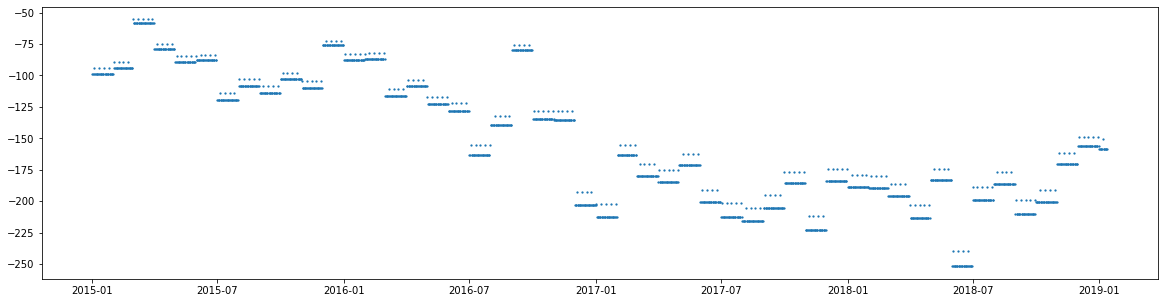

In [13]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.scatter(df['Date'], df['Volume_Pozzo_1'], s=1.5)
plt.show()

In [14]:
df = df.drop([
    'Rainfall_Siena_Poggio_al_Vento',
    'Rainfall_Mensano',
    'Rainfall_Ponte_Orgia',
    'Depth_to_Groundwater_Pozzo_1',
    'Depth_to_Groundwater_Pozzo_3',
    'Depth_to_Groundwater_Pozzo_4'
], axis=1)

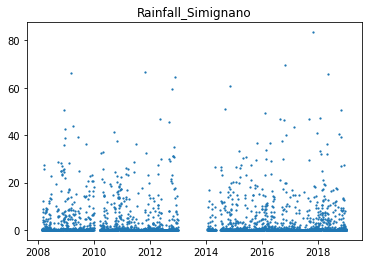

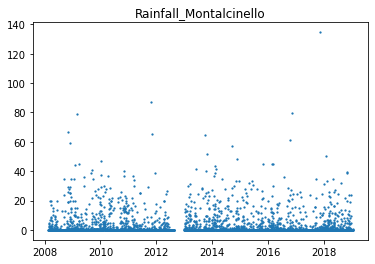

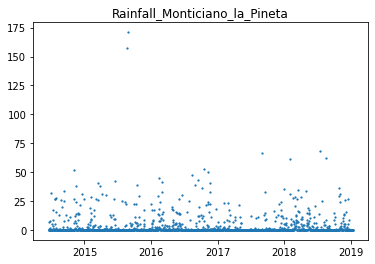

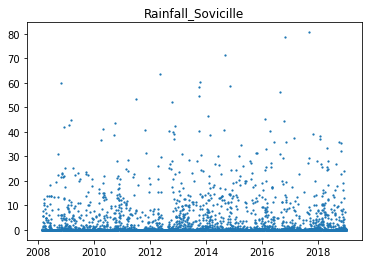

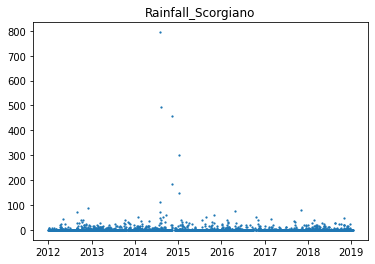

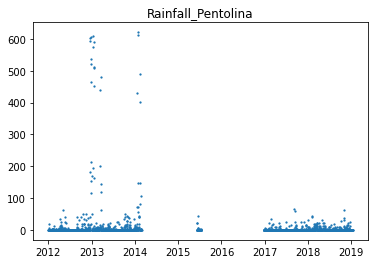

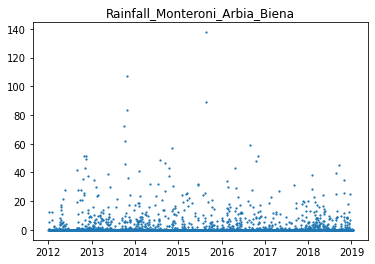

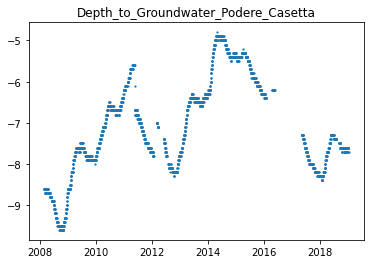

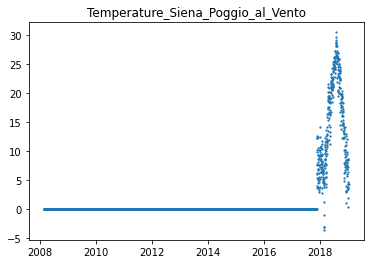

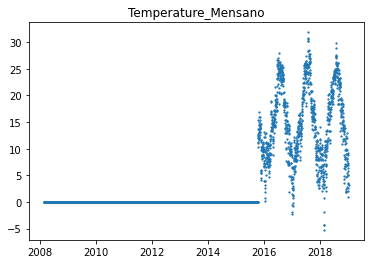

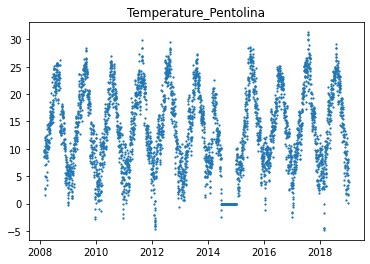

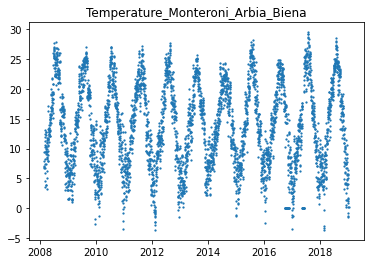

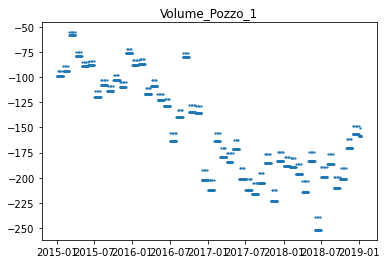

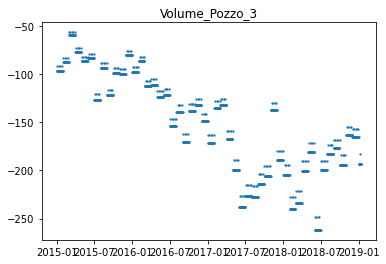

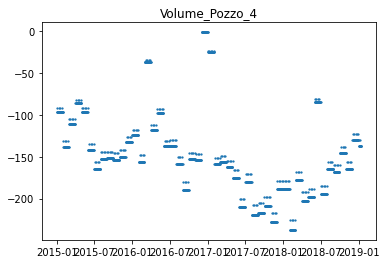

In [15]:
for c in df.columns:
    if c == 'Date':
        continue
    plt.scatter(df['Date'], df[c], s=1.5)
    plt.title(c)
    plt.show()

In [16]:
# exclude again for having too many fake nulls:
#   Temperature_Siena_Poggio_al_Vento
#   Temperature_Mensano

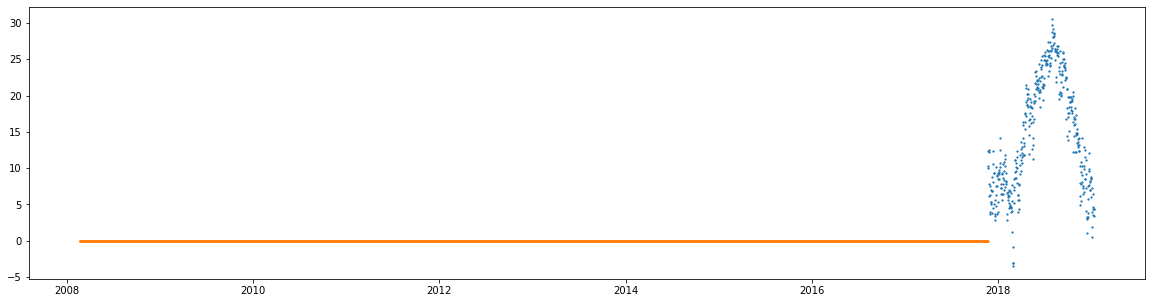

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))
isz = df['Temperature_Siena_Poggio_al_Vento'] == 0
ax.scatter(df[isz]['Date'], df[isz]['Temperature_Siena_Poggio_al_Vento'], s=1.5, c='C1')
ax.scatter(df[~isz]['Date'], df[~isz]['Temperature_Siena_Poggio_al_Vento'], s=1.5, c='C0')
plt.show()

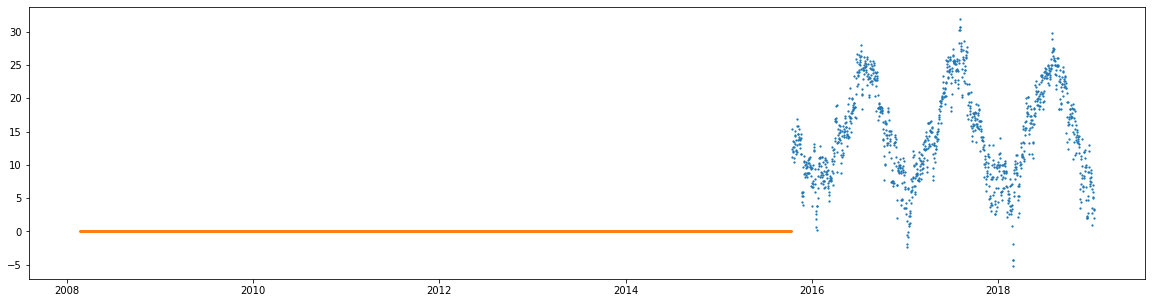

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))
isz = df['Temperature_Mensano'] == 0
ax.scatter(df[isz]['Date'], df[isz]['Temperature_Mensano'], s=1.5, c='C1')
ax.scatter(df[~isz]['Date'], df[~isz]['Temperature_Mensano'], s=1.5, c='C0')
plt.show()

In [19]:
df = df.drop([
    'Temperature_Siena_Poggio_al_Vento',
    'Temperature_Mensano'
], axis=1)

In [20]:
df.isnull().sum()

Date                                      0
Rainfall_Simignano                      540
Rainfall_Montalcinello                  137
Rainfall_Monticiano_la_Pineta          2309
Rainfall_Sovicille                        5
Rainfall_Scorgiano                     1478
Rainfall_Pentolina                     2398
Rainfall_Monteroni_Arbia_Biena         1410
Depth_to_Groundwater_Podere_Casetta     633
Temperature_Pentolina                     0
Temperature_Monteroni_Arbia_Biena         0
Volume_Pozzo_1                         2506
Volume_Pozzo_3                         2506
Volume_Pozzo_4                         2506
dtype: int64

In [21]:
100 * df.isnull().sum() / df.shape[0]

Date                                    0.000000
Rainfall_Simignano                     13.571249
Rainfall_Montalcinello                  3.443076
Rainfall_Monticiano_la_Pineta          58.029656
Rainfall_Sovicille                      0.125660
Rainfall_Scorgiano                     37.145011
Rainfall_Pentolina                     60.266399
Rainfall_Monteroni_Arbia_Biena         35.436039
Depth_to_Groundwater_Podere_Casetta    15.908520
Temperature_Pentolina                   0.000000
Temperature_Monteroni_Arbia_Biena       0.000000
Volume_Pozzo_1                         62.980648
Volume_Pozzo_3                         62.980648
Volume_Pozzo_4                         62.980648
dtype: float64

In [22]:
df[(df['Temperature_Pentolina'] == 0) & (df['Date'] < datetime(2018, 1, 1))]

,Date,Rainfall_Simignano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Scorgiano,Rainfall_Pentolina,Rainfall_Monteroni_Arbia_Biena,Depth_to_Groundwater_Podere_Casetta,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
5290,2014-06-26,NaN,1.2,0.2,0.0,0.0,NaN,0.0,-5.0,0.0,19.10,NaN,NaN,NaN
5291,2014-06-27,NaN,7.8,7.6,26.6,3.2,NaN,0.0,-5.0,0.0,19.35,NaN,NaN,NaN
5292,2014-06-28,NaN,0.0,1.6,0.0,0.0,NaN,0.0,-5.0,0.0,19.95,NaN,NaN,NaN
5293,2014-06-29,NaN,0.0,0.0,0.0,0.0,NaN,0.0,-5.0,0.0,19.75,NaN,NaN,NaN
5294,2014-06-30,NaN,6.6,32.0,17.0,9.4,NaN,23.6,-5.0,0.0,19.85,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,2014-12-27,0.0,0.0,0.0,0.0,0.0,NaN,0.0,-5.3,0.0,2.50,NaN,NaN,NaN
5475,2014-12-28,16.2,15.0,27.0,13.8,14.0,NaN,12.4,-5.3,0.0,2.95,NaN,NaN,NaN
5476,2014-12-29,0.0,0.0,0.2,0.0,0.0,NaN,0.2,-5.3,0.0,1.20,NaN,NaN,NaN
5477,2014-12-30,0.0,0.0,0.0,0.0,0.0,NaN,0.0,-5.4,0.0,-1.10,NaN,NaN,NaN


In [23]:
dd = df[(df['Temperature_Pentolina'] == 0) & (df['Date'] < datetime(2018, 1, 1))]
df.loc[dd.index]

,Date,Rainfall_Simignano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Scorgiano,Rainfall_Pentolina,Rainfall_Monteroni_Arbia_Biena,Depth_to_Groundwater_Podere_Casetta,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
5290,2014-06-26,NaN,1.2,0.2,0.0,0.0,NaN,0.0,-5.0,0.0,19.10,NaN,NaN,NaN
5291,2014-06-27,NaN,7.8,7.6,26.6,3.2,NaN,0.0,-5.0,0.0,19.35,NaN,NaN,NaN
5292,2014-06-28,NaN,0.0,1.6,0.0,0.0,NaN,0.0,-5.0,0.0,19.95,NaN,NaN,NaN
5293,2014-06-29,NaN,0.0,0.0,0.0,0.0,NaN,0.0,-5.0,0.0,19.75,NaN,NaN,NaN
5294,2014-06-30,NaN,6.6,32.0,17.0,9.4,NaN,23.6,-5.0,0.0,19.85,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,2014-12-27,0.0,0.0,0.0,0.0,0.0,NaN,0.0,-5.3,0.0,2.50,NaN,NaN,NaN
5475,2014-12-28,16.2,15.0,27.0,13.8,14.0,NaN,12.4,-5.3,0.0,2.95,NaN,NaN,NaN
5476,2014-12-29,0.0,0.0,0.2,0.0,0.0,NaN,0.2,-5.3,0.0,1.20,NaN,NaN,NaN
5477,2014-12-30,0.0,0.0,0.0,0.0,0.0,NaN,0.0,-5.4,0.0,-1.10,NaN,NaN,NaN


In [24]:
df.loc[df[(df['Temperature_Pentolina'] == 0) & (df['Date'] < datetime(2018, 1, 1))].index, 'Temperature_Pentolina'] = float('nan')

In [25]:
df.isnull().sum()

Date                                      0
Rainfall_Simignano                      540
Rainfall_Montalcinello                  137
Rainfall_Monticiano_la_Pineta          2309
Rainfall_Sovicille                        5
Rainfall_Scorgiano                     1478
Rainfall_Pentolina                     2398
Rainfall_Monteroni_Arbia_Biena         1410
Depth_to_Groundwater_Podere_Casetta     633
Temperature_Pentolina                   189
Temperature_Monteroni_Arbia_Biena         0
Volume_Pozzo_1                         2506
Volume_Pozzo_3                         2506
Volume_Pozzo_4                         2506
dtype: int64

In [26]:
df.loc[df[(df['Temperature_Monteroni_Arbia_Biena'] == 0) & (df['Date'] > datetime(2015, 1, 1))].index, 'Temperature_Monteroni_Arbia_Biena'] = float('nan')

In [27]:
df.isnull().sum()

Date                                      0
Rainfall_Simignano                      540
Rainfall_Montalcinello                  137
Rainfall_Monticiano_la_Pineta          2309
Rainfall_Sovicille                        5
Rainfall_Scorgiano                     1478
Rainfall_Pentolina                     2398
Rainfall_Monteroni_Arbia_Biena         1410
Depth_to_Groundwater_Podere_Casetta     633
Temperature_Pentolina                   189
Temperature_Monteroni_Arbia_Biena        42
Volume_Pozzo_1                         2506
Volume_Pozzo_3                         2506
Volume_Pozzo_4                         2506
dtype: int64

In [28]:
100 * df.isnull().sum() / df.shape[0]

Date                                    0.000000
Rainfall_Simignano                     13.571249
Rainfall_Montalcinello                  3.443076
Rainfall_Monticiano_la_Pineta          58.029656
Rainfall_Sovicille                      0.125660
Rainfall_Scorgiano                     37.145011
Rainfall_Pentolina                     60.266399
Rainfall_Monteroni_Arbia_Biena         35.436039
Depth_to_Groundwater_Podere_Casetta    15.908520
Temperature_Pentolina                   4.749937
Temperature_Monteroni_Arbia_Biena       1.055542
Volume_Pozzo_1                         62.980648
Volume_Pozzo_3                         62.980648
Volume_Pozzo_4                         62.980648
dtype: float64